<a href="https://colab.research.google.com/github/Boburshoh-oss/Fast_AI_Weapon_model_training/blob/main/Aviacompany_customer_churn_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!unzip /content/aviakompaniya.zip

Archive:  /content/aviakompaniya.zip
  inflating: sample_submission.csv   
  inflating: test_dataset.csv        
  inflating: train_dataset.csv       


In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics 

In [4]:
df = pd.read_csv("train_dataset.csv",index_col=0)
df_test = pd.read_csv("test_dataset.csv",index_col=0)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  object 
 1   Customer Type                      10000 non-null  object 
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  object 
 4   Class                              10000 non-null  object 
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1 to 4000
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             4000 non-null   object 
 1   Customer Type                      4000 non-null   object 
 2   Age                                4000 non-null   int64  
 3   Type of Travel                     4000 non-null   object 
 4   Class                              4000 non-null   object 
 5   Flight Distance                    4000 non-null   int64  
 6   Inflight wifi service              4000 non-null   int64  
 7   Departure/Arrival time convenient  4000 non-null   int64  
 8   Ease of Online booking             4000 non-null   int64  
 9   Gate location                      4000 non-null   int64  
 10  Food and drink                     4000 non-null   int64  
 11  Online boarding                    4000 non-null   int64

In [7]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9972.000000,10000.000000
mean,39.375100,1229.556200,2.780200,3.065100,2.797800,2.981000,3.214500,3.349100,3.49140,3.402900,3.454100,3.415700,3.676200,3.360600,3.680100,3.311100,14.429900,14.709888,0.500000
std,14.897959,1022.281958,1.362745,1.527316,1.421168,1.283278,1.333217,1.352779,1.31122,1.331822,1.274777,1.308765,1.189746,1.258462,1.175118,1.311217,39.659674,40.046355,0.500025
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,421.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,863.500000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.500000
75%,51.000000,1806.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,12.000000,1.000000
max,80.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,921.000000,924.000000,1.000000


In [8]:
df['satisfaction'].value_counts()/len(df)*100

0    50.0
1    50.0
Name: satisfaction, dtype: float64

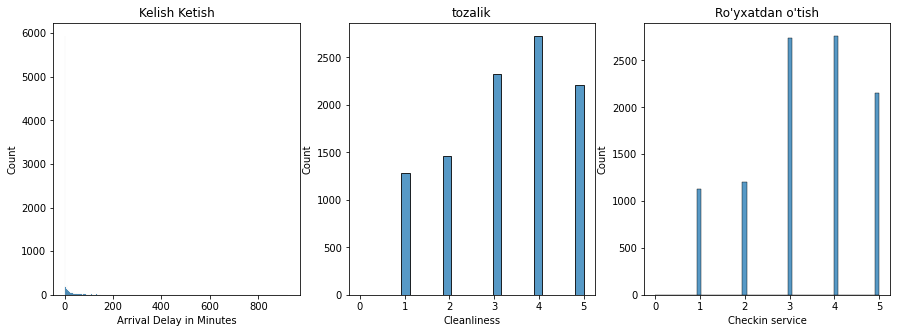

In [9]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

# Tenure
sns.histplot(x="Arrival Delay in Minutes", data=df, ax=axes[0])
axes[0].set_title("Kelish Ketish")

#OrderCount
sns.histplot(x="Cleanliness", data=df, ax=axes[1])
axes[1].set_title("tozalik")

# Cashback
sns.histplot(x="Checkin service", data=df, ax=axes[2])
axes[2].set_title("Ro'yxatdan o'tish")

plt.show()

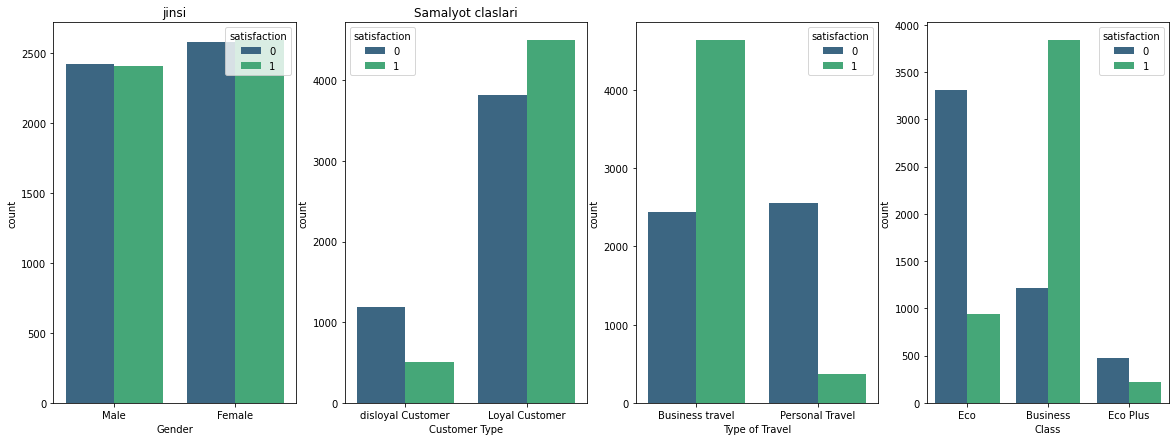

In [10]:
fig, axes = plt.subplots(1,4, figsize=(20,7))

sns.countplot(x='Gender', hue='satisfaction', palette='viridis', data=df, ax=axes[0])
axes[0].set_title("jinsi")

sns.countplot(x='Customer Type', hue='satisfaction', palette='viridis', data=df, ax=axes[1])
axes[1].set_title("mijoz turi (sodiq mijoz, ishonchsiz mijoz)")

sns.countplot(x='Type of Travel', hue='satisfaction', palette='viridis', data=df, ax=axes[2])
axes[1].set_title("Sayohat turi")

sns.countplot(x='Class', hue='satisfaction', palette='viridis', data=df, ax=axes[3])
axes[1].set_title("Samalyot claslari")

plt.show()

In [11]:
df.corrwith(df['satisfaction']).abs().sort_values(ascending=False)

satisfaction                         1.000000
Online boarding                      0.504986
Inflight entertainment               0.400900
Seat comfort                         0.342294
On-board service                     0.326426
Leg room service                     0.324368
Cleanliness                          0.310338
Flight Distance                      0.298703
Inflight wifi service                0.277395
Baggage handling                     0.247965
Inflight service                     0.240584
Checkin service                      0.232359
Food and drink                       0.207854
Ease of Online booking               0.164662
Age                                  0.144302
Departure/Arrival time convenient    0.067638
Arrival Delay in Minutes             0.048650
Departure Delay in Minutes           0.042960
Gate location                        0.007169
dtype: float64

In [12]:
# Forward fill the missing values
df.fillna(method='ffill', inplace=True)
df_test.fillna(method='ffill', inplace=True)

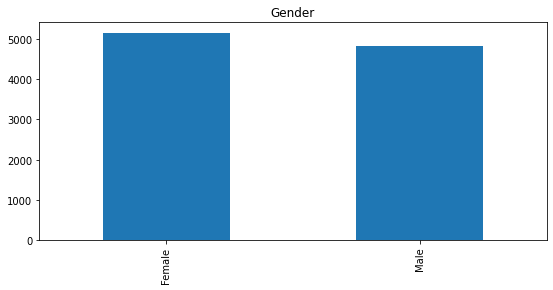

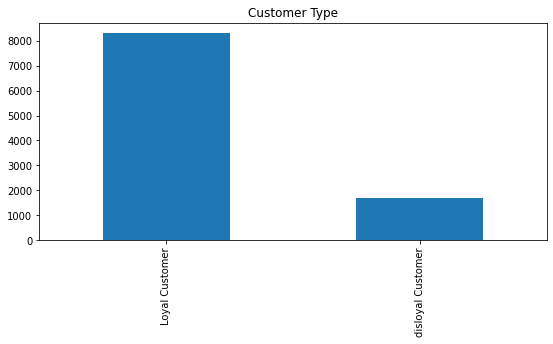

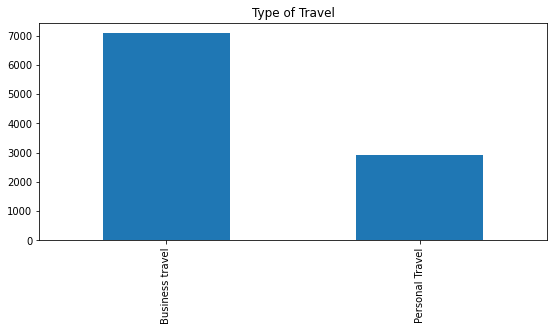

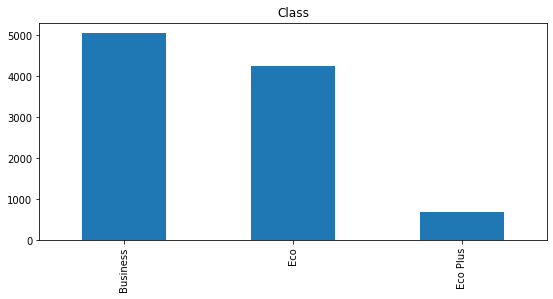

In [13]:
categorical_col = df.select_dtypes(include=['object']).columns

#plotting a bar chart for each of the categorical variable
for column in categorical_col:
  plt.figure(figsize=(20,4))
  plt.subplot(121)
  df[column].value_counts().plot(kind='bar')
  plt.title(column)

In [14]:
# Matnli ustunlarni songa o'tkazamiz
encoded = pd.get_dummies(df)
encoded.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
id,,,,,,,,,,,,,,,,,,,,,
1,33,571,2,3,2,4,4,2,4,4,...,0,0,1,0,1,1,0,0,1,0
2,49,1431,4,1,4,4,3,5,4,5,...,1,1,0,1,0,1,0,1,0,0
3,43,867,1,4,4,4,4,4,3,1,...,0,1,0,1,0,1,0,0,1,0
4,27,1550,3,3,3,3,2,2,2,2,...,1,1,0,1,0,1,0,1,0,0
5,11,526,3,4,3,2,4,3,4,4,...,0,0,1,1,0,0,1,0,1,0


In [36]:
# Matnli ustunlarni songa o'tkazamiz test data uchun
encoded_test_data = pd.get_dummies(df_test)
encoded_test_data.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
id,,,,,,,,,,,,,,,,,,,,,
1,25,2704,2,2,2,3,2,3,5,2,...,191.0,1,0,1,0,0,1,0,1,0
2,49,1623,1,1,1,1,3,4,4,2,...,52.0,1,0,1,0,1,0,1,0,0
3,51,338,4,4,4,4,2,5,5,5,...,0.0,0,1,1,0,1,0,1,0,0
4,34,95,0,0,0,3,5,0,1,5,...,0.0,0,1,1,0,1,0,0,0,1
5,34,602,4,4,4,3,4,5,5,5,...,140.0,0,1,1,0,0,1,0,1,0


In [15]:
X = encoded.drop("satisfaction", axis=1)
y = encoded['satisfaction']

In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [37]:
df_prep = scaler.fit_transform(encoded_test_data)

In [17]:
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1000
           1       0.87      0.85      0.86      1000

    accuracy                           0.86      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.87      0.86      0.86      2000

Model aniqligi: 0.865


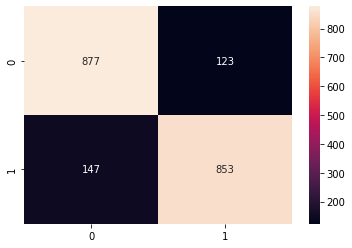

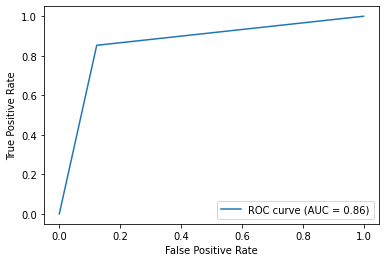

In [18]:
# Modelni yaratamiz (training)
LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)

# Modelni baholaymiz
y_pred = LR_model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

SVM

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1000
           1       0.94      0.92      0.93      1000

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000

Model aniqligi: 0.933


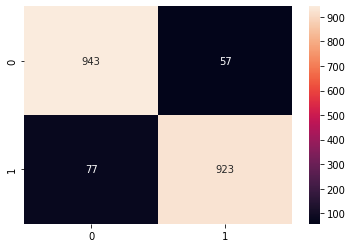

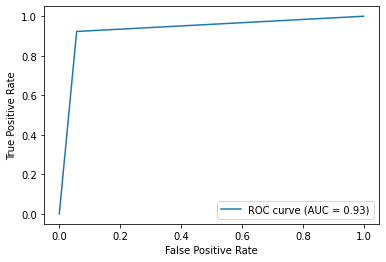

In [22]:
# Modelni yaratamiz (training)
svm_model = SVC()
svm_model.fit(x_train, y_train)

# Modelni baholaymiz
y_pred = svm_model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Decision Tree

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1000
           1       0.93      0.93      0.93      1000

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000

Model aniqligi: 0.929


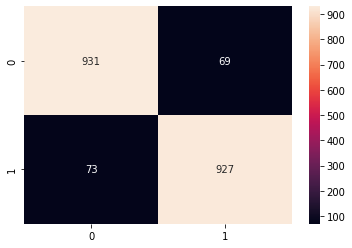

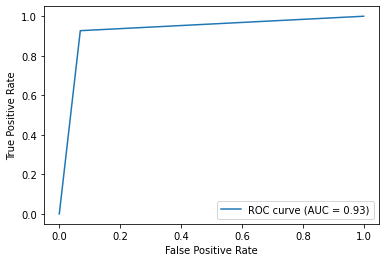

In [23]:
# Modelni yaratamiz (training)
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

# Modelni baholaymiz
y_pred = tree_model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

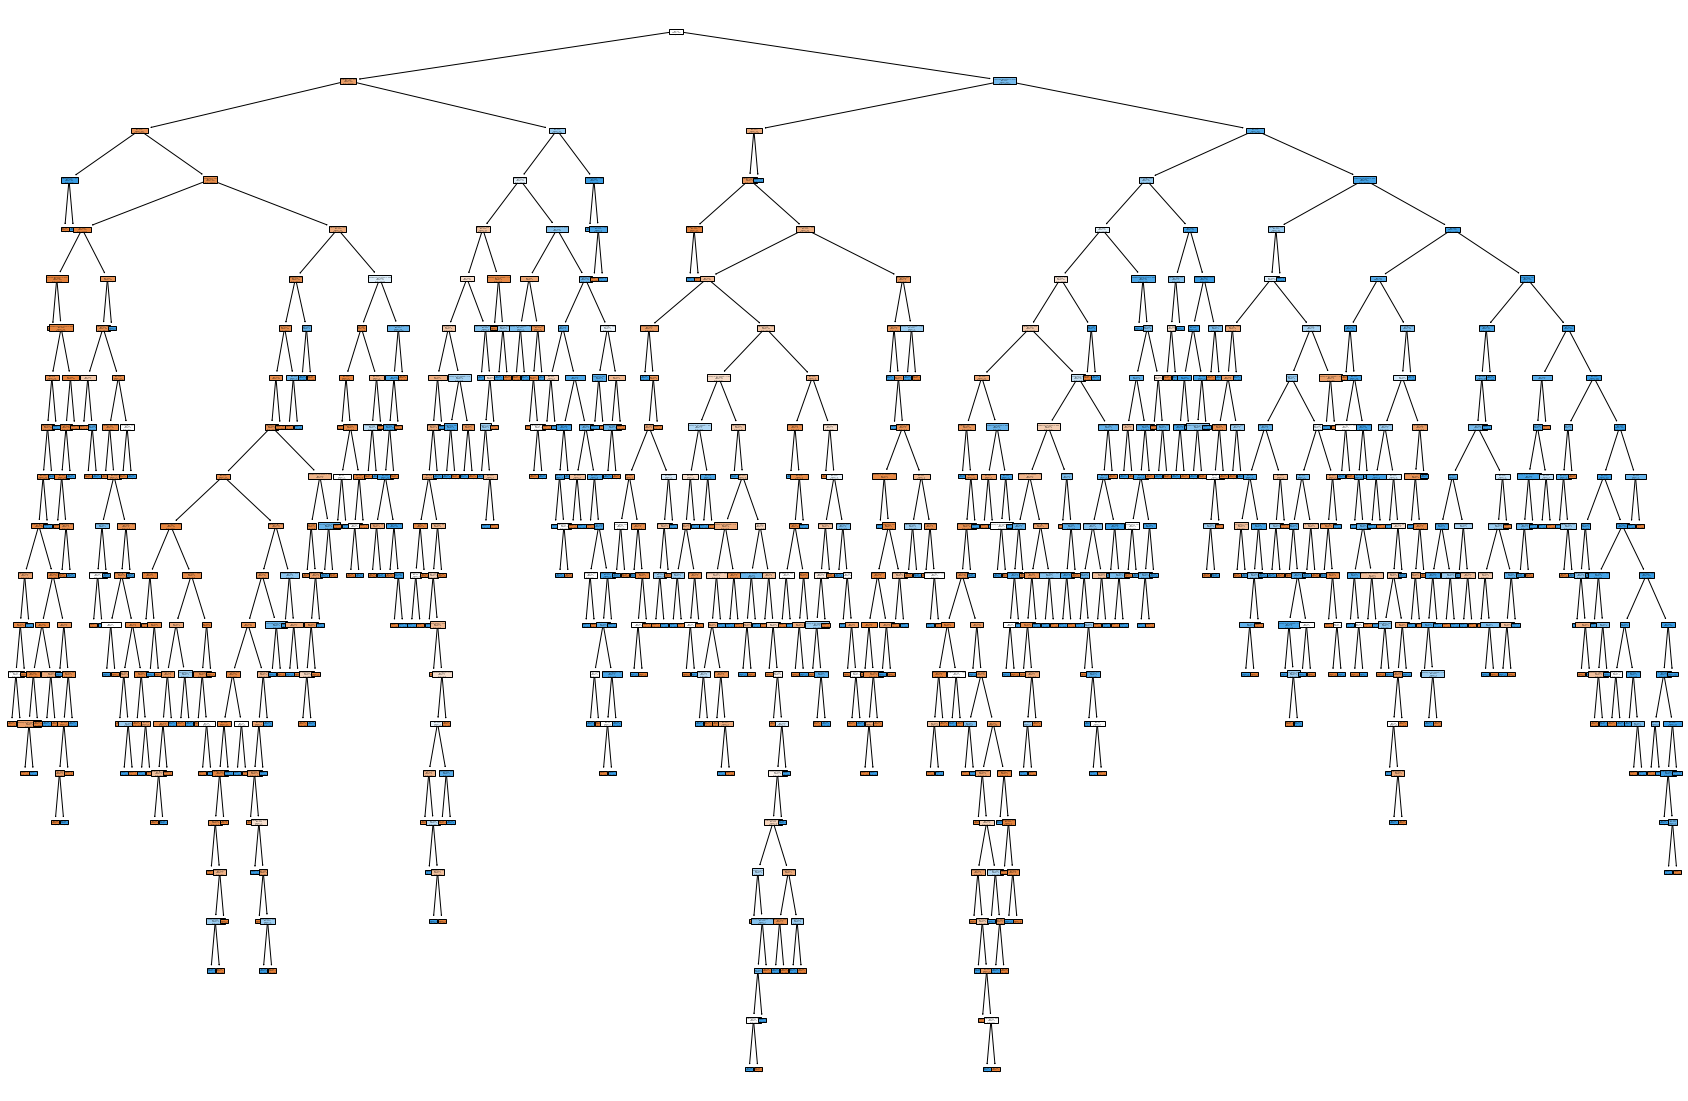

In [25]:
cols = encoded.drop('satisfaction', axis=1).columns

plt.figure(figsize=(30,20))
plot_tree(tree_model, feature_names=cols, filled=True)
plt.show()

Random Forest

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1000
           1       0.94      0.94      0.94      1000

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Model aniqligi: 0.939


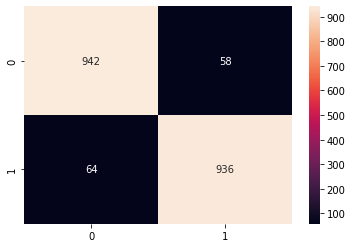

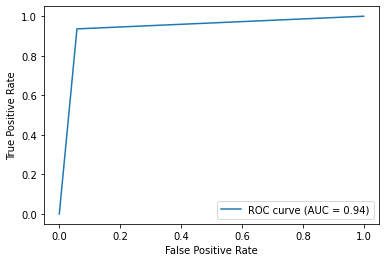

In [27]:
# Modelni yaratamiz (training)
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(x_train, y_train)

# Modelni baholaymiz
y_pred = RF_model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Test score: 0.942
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1000
           1       0.94      0.94      0.94      1000

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Model aniqligi: 0.942


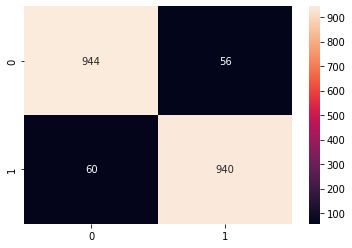

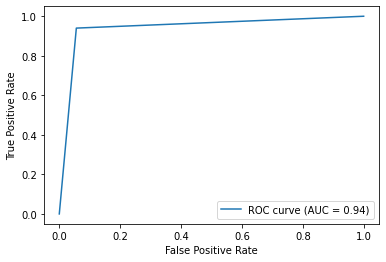

In [30]:
# Define a range of values for n_estimators and other hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestClassifier object
rfc = RandomForestClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

# Train the final model using the selected hyperparameters
rfc = RandomForestClassifier(**grid_search.best_params_, random_state=42)
rfc.fit(x_train, y_train)

# Evaluate the performance of the final model on the testing set
score = rfc.score(x_test, y_test)
print('Test score:', score)

# Modelni baholaymiz
y_pred = rfc.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

XGBoost

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1000
           1       0.94      0.93      0.93      1000

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Model aniqligi: 0.9355


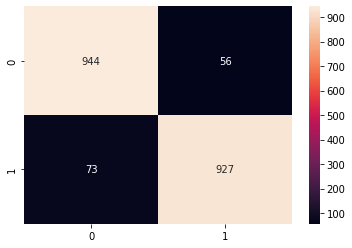

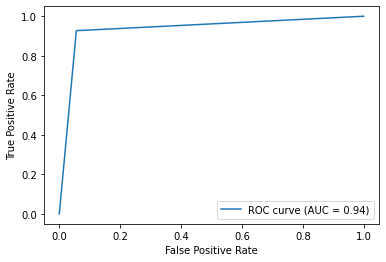

In [28]:
# Modelni yaratamiz (training)
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)

# Modelni baholaymiz
y_pred = xgb_model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Gradient Boosting Machine

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1000
           1       0.95      0.94      0.95      1000

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000

Model aniqligi: 0.948


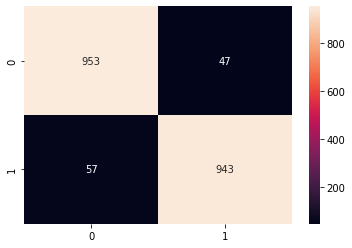

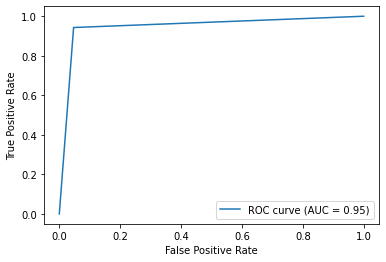

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


# Create a GBM model
gbm = GradientBoostingClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7]
}

# Optimize the hyperparameters using Grid Search
grid_search = GridSearchCV(gbm, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

# Train the GBM model with the best hyperparameters
best_gbm = GradientBoostingClassifier(**grid_search.best_params_)
best_gbm.fit(x_train, y_train)

# Evaluate the performance of the model on the test set
accuracy = best_gbm.score(x_test, y_test)
# Modelni baholaymiz
y_pred = best_gbm.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Hamma datani trening qilamiz

In [34]:
# Train the GBM model with the best hyperparameters
best_gbm = GradientBoostingClassifier(**grid_search.best_params_)
best_gbm.fit(X, y)

# Evaluate the performance of the model on the test set
# accuracy = best_gbm.score(x_test, y_test)


# # Modelni baholaymiz
# y_pred = best_gbm.predict(x_test)
# print(metrics.classification_report(y_test, y_pred))
# print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

# ## confusion matrix
# conf_mat = metrics.confusion_matrix(y_test, y_pred)
# sns.heatmap(conf_mat, annot=True,fmt="g")
# plt.show()

# ## ROC curve
# fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
# roc_auc = metrics.auc(fpr, tpr)
# display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
# display.plot()
# plt.show()

GradientBoostingClassifier(max_depth=7, n_estimators=200)

In [38]:
last_predict = best_gbm.predict(df_prep)

In [39]:
ss_df = pd.read_csv('sample_submission.csv', index_col=0)
ss_df.shape


(4000, 1)

In [40]:
last_predict.shape

(4000,)

In [41]:
ss_df['satisfaction']=last_predict

In [42]:
ss_df.head()

,satisfaction
id,
1,0
2,1
3,1
4,1
5,0


In [44]:
ss_df.to_csv('aircompany_predict_satisfaction.csv')